In [42]:
# Load the libraries
from __future__ import print_function

import os, sys, gzip, glob, json, time, argparse
import pandas as pd
import numpy as np
import keras
from pandas.io.json import json_normalize

from pandas.io.json import json_normalize
from keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from keras.utils import to_categorical
from keras import backend as K
from keras.layers import Input, Dense, Dropout, Activation, Conv1D, MaxPooling1D, Flatten
from keras import optimizers
from keras.optimizers import SGD, Adam, RMSprop
from keras.models import Sequential, Model, model_from_json, model_from_yaml
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau

from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import sklearn.manifold as sk_manif
import scanpy as sc 

import matplotlib.pyplot as plt
%matplotlib inline

# Data Preparation   

In [2]:
# Read features and output files 
TC1data15 = pd.read_csv("TC1-S1-data15.tsv", sep="\t", low_memory = False)
#TC1data15 = sfeatures1

In [3]:
outcome = pd.read_csv('TC1-outcome-data15.tsv', sep='\t',names='y')

In [4]:
#outcome = outcome.values
outcome = outcome['y']

In [5]:
def encode(data): 
    print('Shape of data (BEFORE encode): %s' % str(data.shape))
    encoded = to_categorical(data)
    print('Shape of data (AFTER  encode): %s\n' % str(encoded.shape))
    return encoded



# Feature Selection(PCA) + t-SNE

In [10]:
import tc1_library
import importlib
import sklearn.decomposition as sk_decomp

importlib.reload(tc1_library);

* add label for plot
* what can we learn from the figure from the groups that are overlap, are these realted with each other


Top 10 PCA explained variance ratios: [0.11951665 0.10788788 0.05949288 0.05309376 0.04052011 0.03719555
 0.02759182 0.02507799 0.02285892 0.01953212]


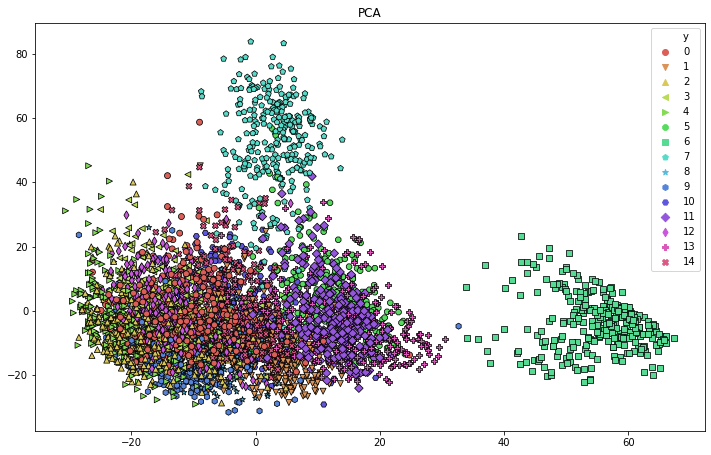

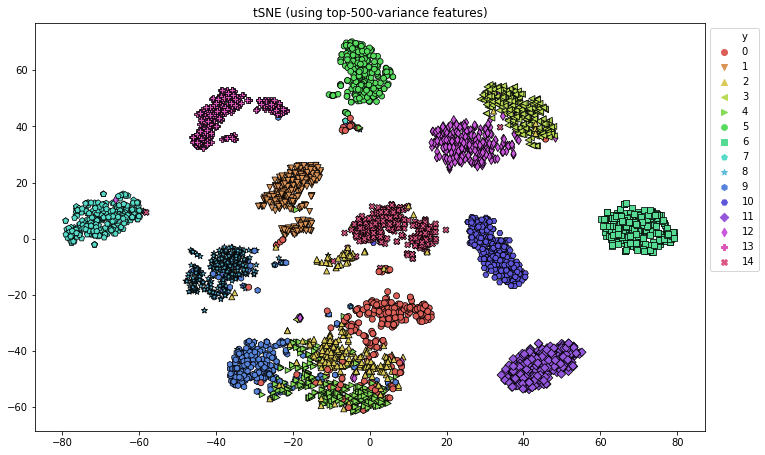

In [11]:
tc1_library.run_and_plot_pca_and_tsne(TC1data15, outcome)

## PCA

In [81]:
pca = PCA(0.95)
pca_results = pca.fit_transform(TC1data15)


In [85]:
loadings = pd.DataFrame(pca.components_.T, index=TC1data15.columns)
loadings

,0,1,2,3,4,5,6,7,8,9,...,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945
0,0.001059,-0.000904,0.000494,-0.006398,0.001234,-0.005441,-0.008869,-0.001303,-0.007121,-0.006875,...,0.005926,0.005137,-0.007586,-0.014260,-0.002450,0.001046,0.000483,-0.006800,-0.006220,0.003201
1,-0.000056,-0.000431,0.002453,-0.000526,0.002518,-0.000661,-0.000448,0.001281,0.002550,-0.002433,...,0.004069,-0.003935,0.002023,-0.012519,0.006703,-0.012236,-0.009225,0.003262,0.005443,-0.000905
2,-0.004084,-0.005749,-0.001141,-0.001792,0.002133,-0.003579,-0.007833,-0.001708,-0.002476,0.003542,...,0.000175,-0.000925,0.001821,0.001982,-0.000179,0.002356,0.000382,-0.001602,0.001822,0.002236
3,0.001336,-0.006378,0.003935,-0.003454,-0.001244,-0.007738,-0.005037,-0.003919,-0.005903,0.001739,...,-0.002554,0.000980,-0.000806,-0.004333,-0.004974,0.002149,-0.002169,-0.005248,-0.001807,-0.003160
4,-0.006355,-0.008396,-0.004065,0.000621,0.005981,-0.006489,-0.012180,-0.009577,-0.006819,0.000416,...,-0.003323,0.004233,-0.001230,0.005399,0.005001,0.009845,-0.002034,-0.004270,0.001624,0.001096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60478,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,...,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000
60479,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,...,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000
60480,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,...,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000
60481,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,...,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000


In [93]:
abs_loading = loadings.abs()

In [94]:
sum_loading = abs_loading.sum(axis=1)

In [98]:
sum_loading

0        9.132597
1        9.486756
2        4.374390
3        4.672492
4        6.018668
           ...   
60478    0.000000
60479    0.000000
60480    0.000000
60481    0.000000
60482    0.000000
Length: 60483, dtype: float64

In [103]:
sum(sum_loading >= 15)

1883

In [104]:
sum_loading.loc[sum_loading >= 15,]

15       18.118817
25       23.661325
34       16.386817
40       16.266705
44       19.858020
           ...    
59386    15.184301
59578    19.893650
59782    15.716745
59971    18.089839
59998    16.049877
Length: 1883, dtype: float64

## t-SNE

In [17]:
#X_by_variance = TC1data15.iloc[:,[int(x) for x in TC1data15.var().sort_values(ascending=False).index]]

#tsne = TSNE(n_components=2)
#tsne_results = tsne.fit_transform(X_by_variance.iloc[:,:500])


In [106]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.3))
sel_by_var = sel.fit_transform(TC1data1`5)

In [107]:
TC1data15.shape, sel_by_var.shape

((4500, 60483), (4500, 1830))

In [108]:
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(sel_by_var)

Text(0.5, 1.0, 'tSNE (using top-1830-variance features)')

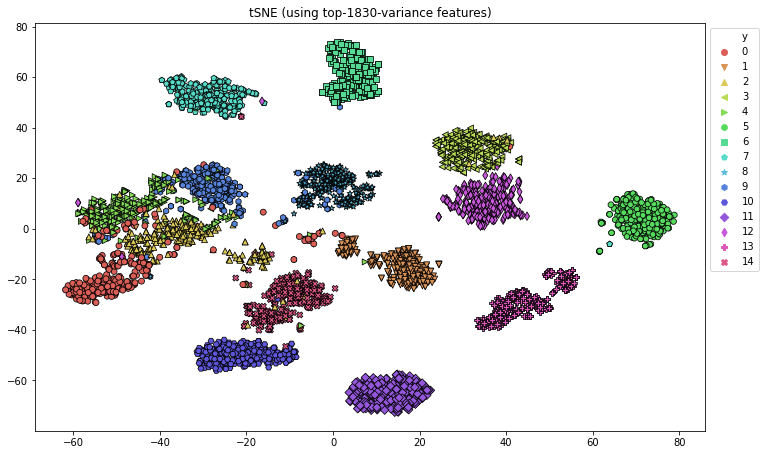

In [109]:
ax = tc1_library.plot_unsupervised_learning_results(tsne_results, outcome)
ax.set_title('tSNE (using top-{}-variance features)'.format(sel_by_var.shape[1]))